In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
datas = pd.read_csv("heart.csv")
datas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
X = datas.iloc[:,:-1].values #Set columns needed for 
y = datas.iloc[:,-1].values #Set target value to y 


In [15]:
#Split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [16]:
#rescale data, will be needed for KNN
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_trainSc = sc_X.fit_transform(X_train)
X_testSc = sc_X.fit_transform(X_test)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
logisticreg.fit(X_train,y_train)

C:\Users\vvd09\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
logistic_preds = logisticreg.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report:")
print(classification_report(y_test,logistic_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,logistic_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,logistic_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Confusion Matrix:
[[24  7]
 [ 1 29]]
Accuracy Score: 
0.8688524590163934


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)

In [21]:
print("Classification Report:")
print(classification_report(y_test,forest_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,forest_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,forest_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

Confusion Matrix:
[[24  7]
 [ 1 29]]
Accuracy Score: 
0.8688524590163934


# K-Nearest Neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainSc,y_train)

KNeighborsClassifier()

In [23]:
knn_preds = knn.predict(X_testSc)
print("Classification Report:")
print(classification_report(y_test,knn_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,knn_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.84      0.87      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
[[26  5]
 [ 4 26]]


C:\Users\vvd09\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\vvd09\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vvd09\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

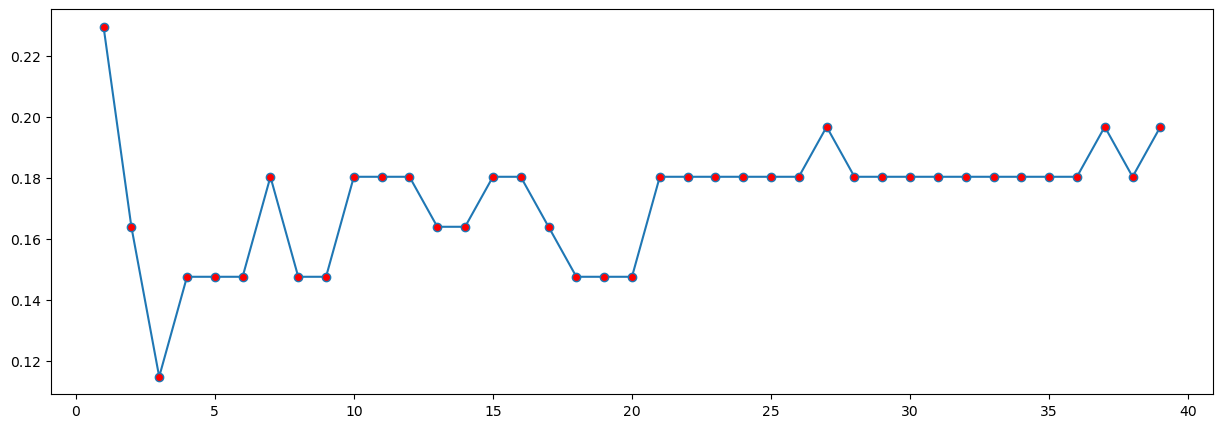

In [25]:
#find best value of k
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainSc,y_train)
    pred_i = knn.predict(X_testSc)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(15,5))
plt.plot(range(1,40), error_rate, marker='o', markerfacecolor='red')

In [26]:
# From the above graph, k = 3 is the best value for k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainSc,y_train)

knn_preds = knn.predict(X_testSc)

print("Classification Report:")
print(classification_report(y_test,knn_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,knn_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,knn_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.89        30

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix:
[[27  4]
 [ 3 27]]
Accuracy Score: 
0.8852459016393442


C:\Users\vvd09\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# #Support Vector Machine - Linear



In [27]:
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
svm_preds = svm_model.predict(X_test)

In [29]:
print("Classification Report:")
print(classification_report(y_test,svm_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,svm_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61

Confusion Matrix:
[[23  8]
 [ 2 28]]
Accuracy Score: 
0.8360655737704918


# Svm Kernel RBF

In [30]:
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train,y_train)

SVC(random_state=0)

In [31]:
svm_preds = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,svm_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,svm_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.32      0.45        31
           1       0.56      0.90      0.69        30

    accuracy                           0.61        61
   macro avg       0.67      0.61      0.57        61
weighted avg       0.67      0.61      0.57        61

Confusion Matrix:
[[10 21]
 [ 3 27]]
Accuracy Score: 
0.6065573770491803


In [32]:
# Find most optimal params
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.551 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.551 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.551 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.551 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.562 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.551 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.708 total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.688 total time=   0.0s
[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.792 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [33]:
print("best params for SVM RBF: ")
grid.best_params_

best params for SVM RBF: 


{'C': 100, 'gamma': 0.0001}

In [34]:
svm_model = SVC(kernel='rbf', random_state=0, C=100, gamma=0.0001)
svm_model.fit(X_train,y_train)

SVC(C=100, gamma=0.0001, random_state=0)

In [35]:
svm_preds = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,svm_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,svm_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.74      0.97      0.84        30

    accuracy                           0.82        61
   macro avg       0.85      0.82      0.82        61
weighted avg       0.85      0.82      0.82        61

Confusion Matrix:
[[21 10]
 [ 1 29]]
Accuracy Score: 
0.819672131147541


# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [37]:
tree_preds = tree.predict(X_test)

print("Classification Report:")
print(classification_report(y_test,tree_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test,tree_preds))

print("Accuracy Score: ")
print(accuracy_score(y_test,tree_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
[[24  7]
 [ 3 27]]
Accuracy Score: 
0.8360655737704918
